# sounddeviceチュートリアル
 ## Pythonからマルチチャンネル出力を行う方法

### 1. モジュールのインポート 
モジュールがない場合はインストールしてください

In [1]:
import sounddevice as sd
import numpy as np #NumPyは基本必須です.
import matplotlib.pyplot as plt # 波形確認用. なくても良い.

### 2. 使用可能なデバイスID, 名前を表示

In [2]:
sd.query_devices()

> 0 MacBook Proのマイク, Core Audio (1 in, 0 out)
< 1 MacBook Proのスピーカー, Core Audio (0 in, 2 out)
  2 機器セット, Core Audio (0 in, 0 out)

### 3. 使用する機器のIDをデフォルトに設定

In [3]:
sd.default.device = 1
# sd.default.device = [4, 5]として入出力をそれぞれ設定することもできます.

### 4. サンプリング周波数を設定

In [4]:
#40kHzなら192000で十分です.
fs = 192000
sd.default.samplerate = fs

### 5. 信号を作る

In [5]:
#　1kHの正弦波とそれの位相を反転した信号を作ってます.
zeros = np.zeros(fs)
pi = np.pi
f1 = 1000
sin1 = np.sin(2*pi*f1*np.arange(0,fs)/fs)
sin2 = np.sin(2*pi*f1*np.arange(0,fs)/fs+pi)

sig = np.array([sin1,sin2])

### 6. 波形をプロットしてみる

/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


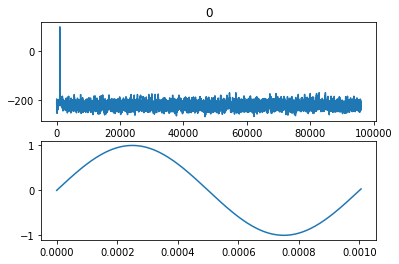

/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


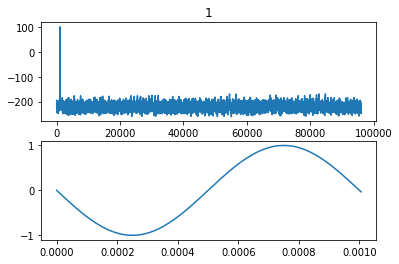

In [6]:
for i,s in enumerate(sig):
    #先ほど作った信号をフーリエ変換
    sigF = np.fft.fft(s, n=fs)

    fig = plt.figure(i)
 
    ax1 = fig.add_subplot(211,title = str(i))
    ax2 = fig.add_subplot(212)
    ax1.plot(20*np.log10(sigF[0:int(fs/2)]))
    ax2.plot(np.arange(0,int(fs/f1)+2)/fs,s[0:int(fs/f1)+2])
    plt.show()

### 6. 振幅調整
大きい値を設定するとアンプ壊れます. 慎重に.

In [7]:
# 振幅の設定. 音響ピンセットの制御の場合こちらの値を変更するか, RMEのTotalmixで振幅を調整
amp_list =  [0.05,0.05]
# 信号長 x チャンネル数(デバイスの) の行列
sig_list = np.zeros((fs,2))
# 入力波形を格納
sig_list[:,0] = sig[0]*amp_list[0]
sig_list[:,1]= sig[0]*amp_list[1]

### 7. 再生

In [8]:
#loop=Trueにするとループ再生します
sd.play(sig_list,fs,loop=True)

### 7. 停止 

In [9]:
sd.stop()